In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling as pp
warnings.filterwarnings('ignore')
%matplotlib inline

In [73]:
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.image as mpimg

In [74]:
sns.set_style('white')

In [75]:
img=Image.open('tiger.png')

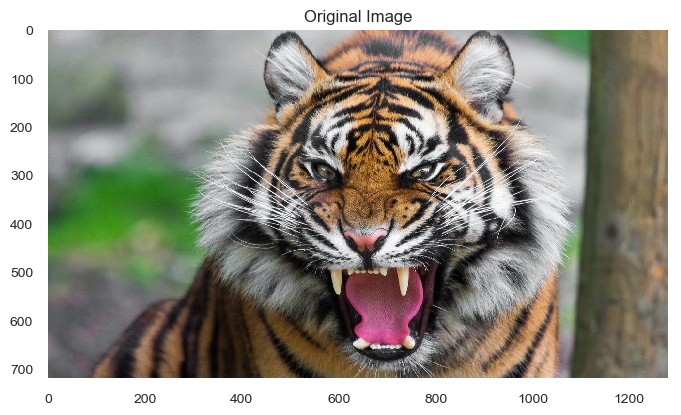

In [76]:
plt.figure(figsize=(8,5),dpi=100)
plt.title('Original Image')
plt.imshow(img)

In [77]:
img_np=np.array(img)   #Conveting image in RGB for each Pixels

In [78]:
img_np.shape   #720 Pixels and 3 value for each of these pixels

(720, 1280, 3)

In [79]:
img_np[0,:,:].shape   #Pixel 0 itself has 1280 rows for RGB Combinations

(1280, 3)

In [80]:
img_np.shape[0]

720

In [81]:
img_np.shape[1]

1280

In [82]:
img_np.shape[2]

3

In [83]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [84]:
pixels

array([[164, 160, 159],
       [165, 161, 160],
       [164, 163, 161],
       ...,
       [119, 115, 106],
       [121, 117, 108],
       [122, 118, 109]], dtype=uint8)

In [20]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
pixel_labels= model.labels_

In [86]:
pixel_labels.shape[0]

921600

In [87]:
cluster_centers=model.cluster_centers_

In [88]:
cluster_centers.shape

(16, 3)

In [89]:
final=np.zeros((pixel_labels.shape[0],3))
for cluster_no in range(16):
    final[pixel_labels==cluster_no]=cluster_centers[cluster_no]
    #Go to the Pixel Label if it is 1 then replace it by cluster center 1(for 1 loop)
final[0:5]

array([[154.28373324, 156.796158  , 155.208971  ],
       [154.28373324, 156.796158  , 155.208971  ],
       [154.28373324, 156.796158  , 155.208971  ],
       [154.28373324, 156.796158  , 155.208971  ],
       [154.28373324, 156.796158  , 155.208971  ]])

In [90]:
#Bring RGB back in to original Shape
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

In [91]:
comp_image=Image.fromarray(np.uint8(comp_image))  #Bringing Pixels back in to image
comp_image.save('tiger_compressed.png')  #Save Image

In [92]:
img_1 = mpimg.imread('tiger.png')
img_2 = mpimg.imread('tiger_compressed.png')  #Read Saved Image

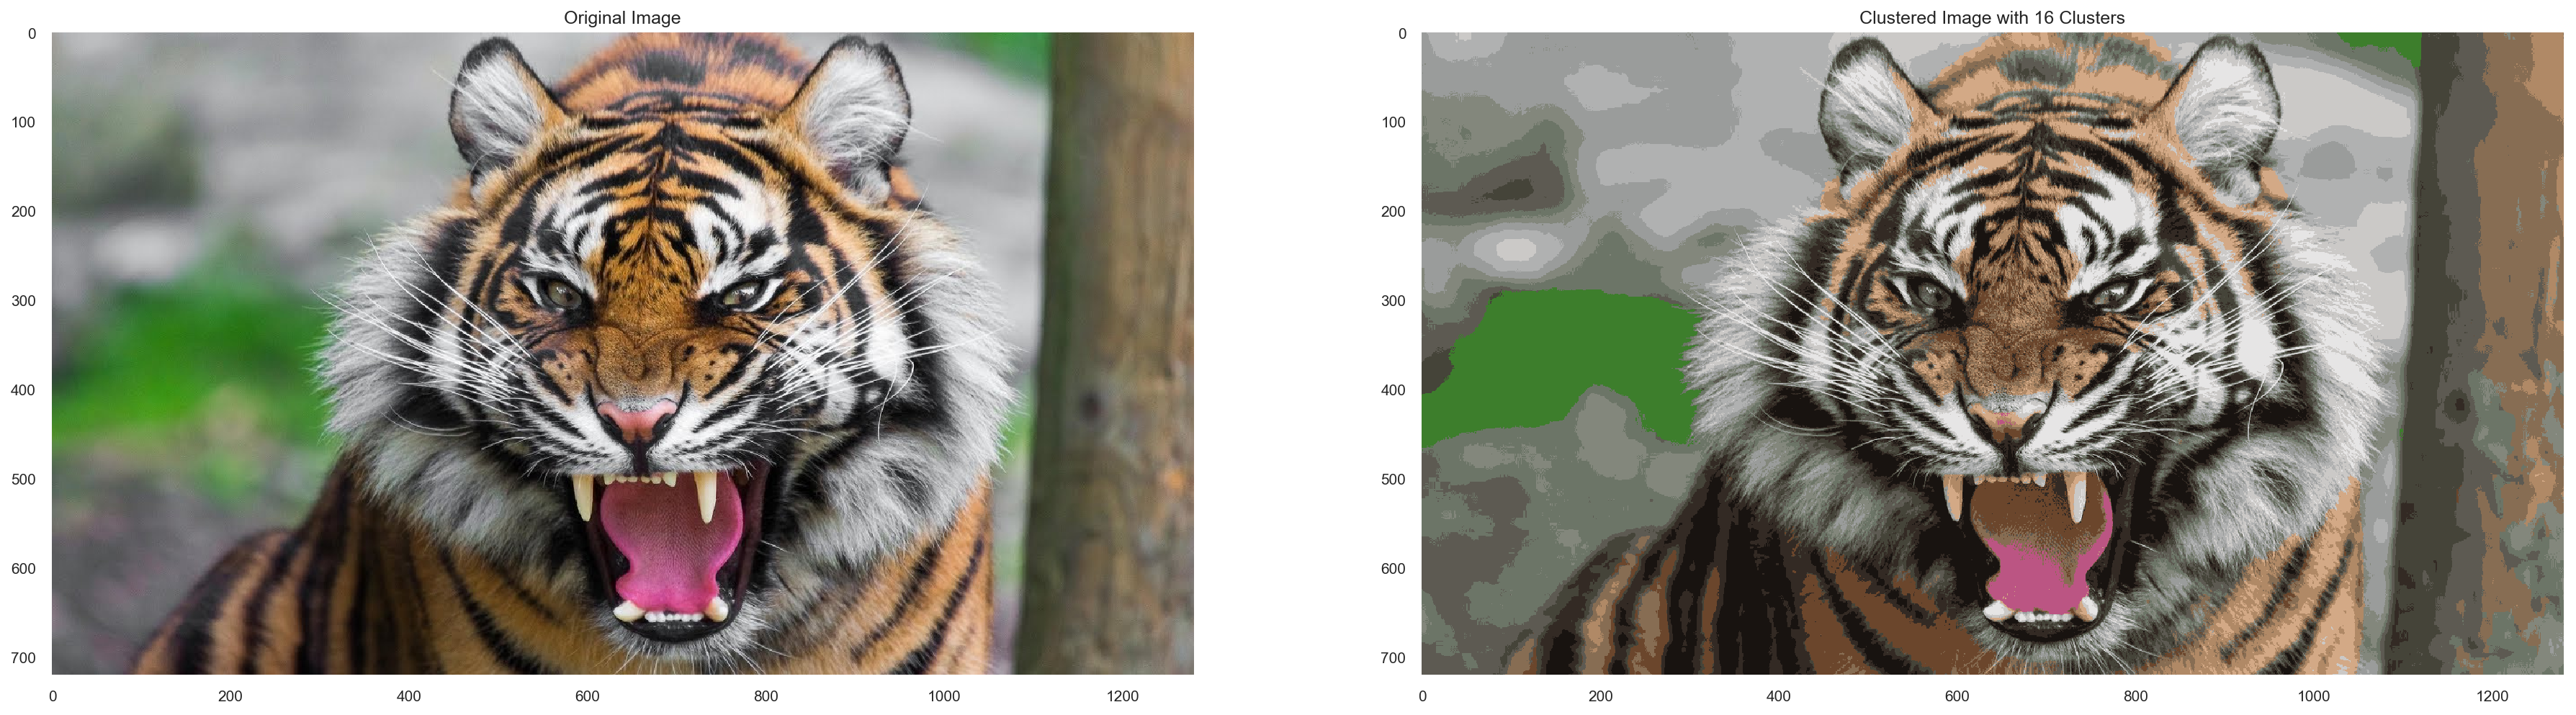

In [93]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(30,30),dpi=150)
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Clustered Image with 16 Clusters')
plt.show()